<a href="https://colab.research.google.com/github/FarrelAD/2341720081_ML_2025/blob/main/JS13/P3_JS13.ipynb" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Preparation

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Load Dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Encoding Data

In [4]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Data Splitting

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Definition

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model Training

In [7]:
model.fit(X_train, y_train, epochs=50, batch_size=8)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2984 - loss: 1.3850
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2904 - loss: 1.3242 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3570 - loss: 1.1604 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2743 - loss: 1.1884 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3697 - loss: 1.0759 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2824 - loss: 1.1066     
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3667 - loss: 1.0457 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3177 - loss: 1.0461 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2913 - loss: 1.0407 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3870 - loss: 1.0156 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3171 - loss: 1.0235 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accurac

# Evaluation

In [8]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi: {acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9667 - loss: 0.5631
Akurasi: 0.9666666388511658


---

# Questions

1. Ubah learning rate!

**Jawab:** Konfigurasi learning rate pada sebuah model berbasis neural network terletak pada optimizer yang biasanya berkaitan dengan proses training data. Sebelumnya, konfigurasi dari model saat proses *compile* seperti ini:
```py
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
```

Jika ingin merubah learning rate, maka tinggal merubah parameter `optimizer`-nya saja. Secara default, `adam` optimizer memiliki learning rate senilai `0.001`. Jika ingin tetap menggunakan optimizer Adam namun ingin merubah learning rate, maka tinggal merubah parameter `learning_rate` dari class `Adam`

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # 0.01, lebih besar daripada 0.001
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

2. Bandingkan hasil loss.

**Jawab:**

In [10]:
model.fit(X_train, y_train, epochs=50, batch_size=8)

loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi: {acc}")

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7783 - loss: 0.6079
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6127 - loss: 0.5855 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8881 - loss: 0.4661 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8276 - loss: 0.3955 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9034 - loss: 0.3730 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8901 - loss: 0.3534 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9412 - loss: 0.3079 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9768 - loss: 0.2868 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9367 - loss: 0.2733 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9455 - loss: 0.2527 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8843 - loss: 0.3215 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

Hasilnya adalah pada epoch terakhir bisa diperoleh nilai loss yang lebih kecil yaitu `0.1082`. Bahkan sempat menyentuh angka `0.0369`. Hasil ini memungkinkan karena step yang dilakukan lebih besar (`0.01`) pada Adam optimizer jika dibandingkan default parameternya.

---

# New Practicum

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston #  dataset racial issue, so downloading manual for the solution
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [19]:
# Load
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# The dataset is structured in a weird 2-row format, so we need to reshape it:
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

print("Data shape:", X.shape)
print("Target shape:", y.shape)

Data shape: (506, 13)
Target shape: (506,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


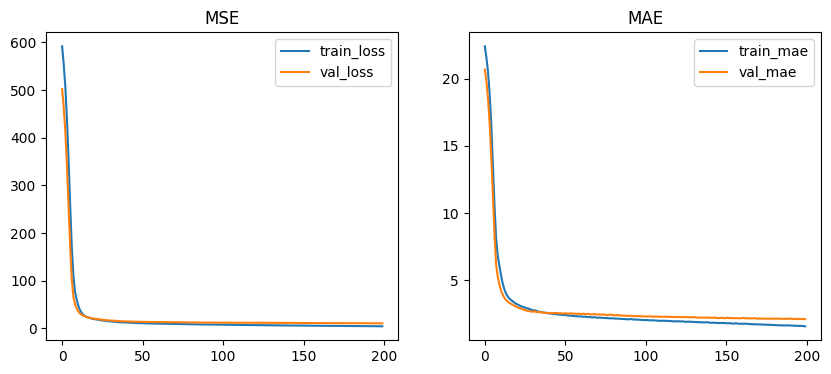

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
RMSE: 3.2571577537534284


In [20]:
# 2. Preprocess
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model
model = Sequential([
Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
Dense(32, activation='relu'),
Dense(1)
])
model.compile(optimizer=Adam(1e-3), loss='mse', metrics=['mae'])

# 4. Train
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

# 5. Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(h.history['loss'], label='train_loss'); plt.plot(h.history['val_loss'], label='val_loss'); plt.legend(); plt.title('MSE')
plt.subplot(1,2,2); plt.plot(h.history['mae'], label='train_mae'); plt.plot(h.history['val_mae'], label='val_mae'); plt.legend(); plt.title('MAE')
plt.show()

pred = model.predict(X_val)
print('RMSE:', np.sqrt(mean_squared_error(y_val, pred)))